In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Relationship between popularity of films & its rating

<AxesSubplot: xlabel='RATING', ylabel='VOTES'>

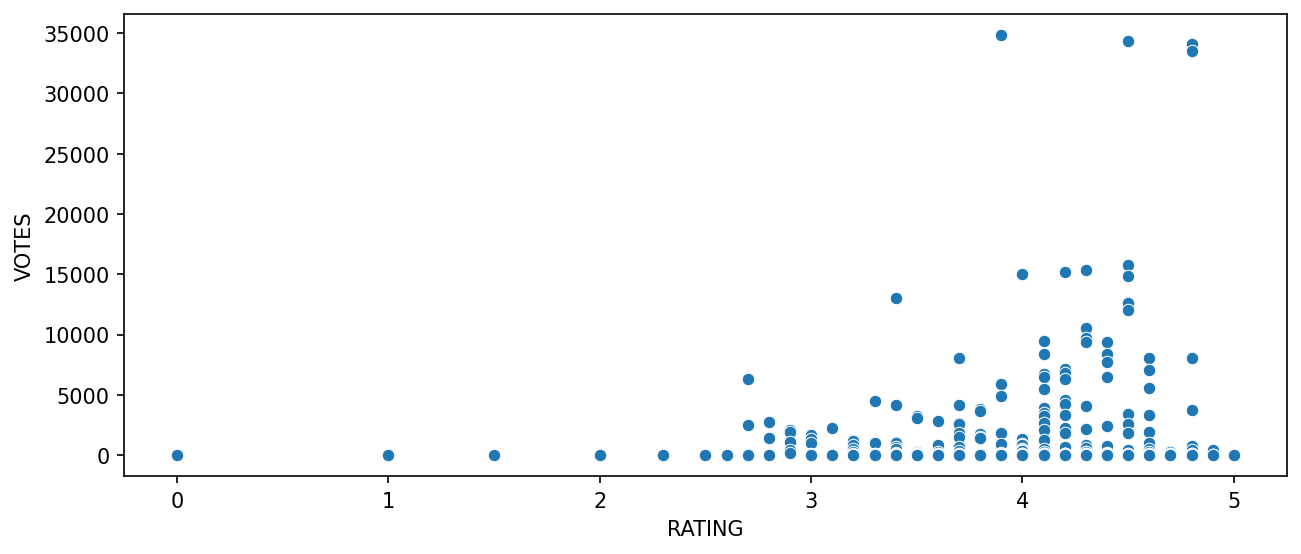

In [12]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,y="VOTES",x="RATING")

Calculation the correlation between the columns:

In [13]:
fandango.corr()

C:\Users\Yagnesh\AppData\Local\Temp\ipykernel_7776\1316820973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fandango.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Extract year from title of the film

In [15]:
fandango["YEAR"] = fandango["FILM"].apply(lambda title: title.split('(')[-1].replace(')','')) 
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


How many movies are in fandango DataFrame per year?

In [16]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Visualize the count of movies per year with plot:

<AxesSubplot: xlabel='YEAR', ylabel='count'>

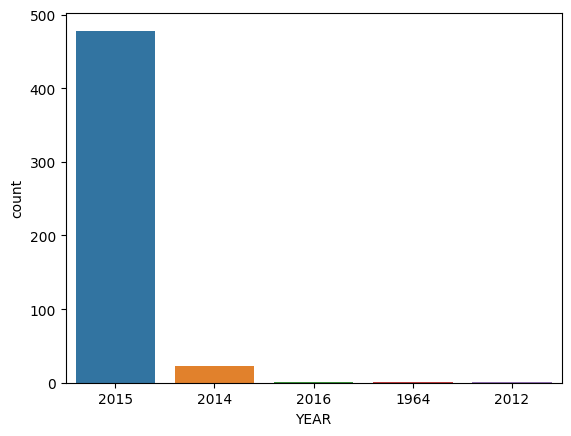

In [17]:
sns.countplot(data=fandango,x="YEAR")

What are the 10 movies with the highest numbers of votes?

In [18]:
fandango.nlargest(10,"VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


How many movies have zero votes?

In [21]:
len(fandango[fandango["VOTES"] == 0])

69

Create DataFrame of only reviewed films by removing any films with zero votes.

In [23]:
fan_reviewed = fandango[fandango["VOTES"]>0] 
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


Create KDE plot that display dist of ratings that are displayed vs the true rating was from votes

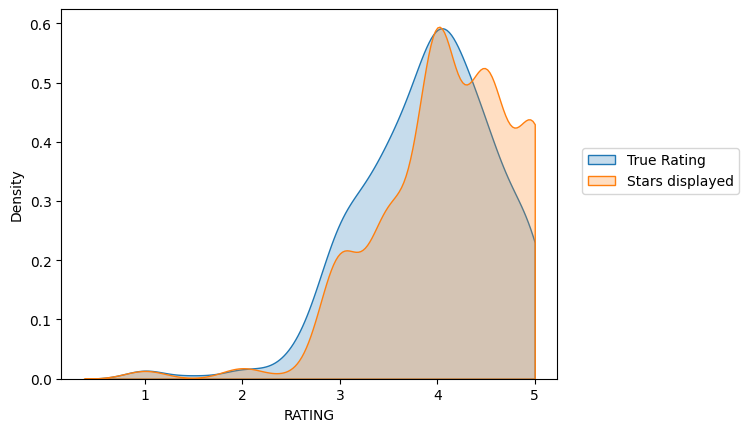

In [29]:
sns.kdeplot(data = fan_reviewed ,x="RATING",clip=[0,5],fill=True,label="True Rating")
sns.kdeplot(data = fan_reviewed ,x="STARS",clip=[0,5],fill=True,label="Stars displayed")

plt.legend(loc = (1.05,0.5))

Create col of diff between STARTS vs true RATING. and round of.

In [33]:
fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS"] - fan_reviewed["RATING"]
fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS_DIFF"].round(2)  
fan_reviewed

C:\Users\Yagnesh\AppData\Local\Temp\ipykernel_7776\2240037197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS"] - fan_reviewed["RATING"]
C:\Users\Yagnesh\AppData\Local\Temp\ipykernel_7776\2240037197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = fan_reviewed["STARS_DIFF"].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


Create countplot to display the number of times a certain difference occuers:

<AxesSubplot: xlabel='STARS_DIFF', ylabel='count'>

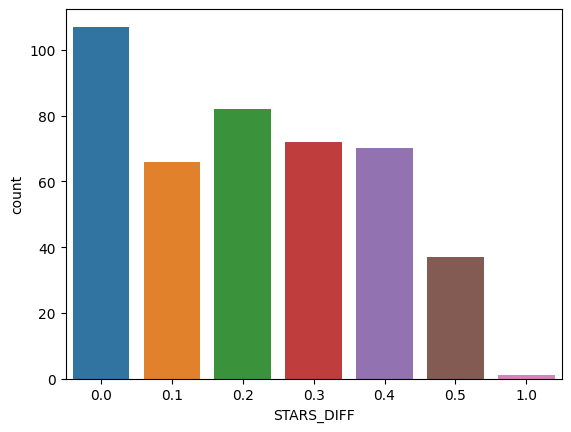

In [34]:
sns.countplot(data=fan_reviewed,x="STARS_DIFF")

What movie had diff of 1?

In [35]:
fan_reviewed[fan_reviewed["STARS_DIFF"]==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0
